## Data Incubator Challenge

This notebook shows questions from Data Incubator Challenge of 2019

## Table of Contents

1. [Section 1: New York City Fires](#Section-1:-New-York-City-Fires)
2. [Section 2: Cars in a circular road](#Section-2:-Cars-in-a-circular-road)

### Section 1: New York City Fires
#### ([Back to Top](#Table-of-Contents))
The New York City Fire Department keeps a log of detailed information on incidents handled by FDNY units. In this challenge we will work with a dataset that contains a record of incidents handled by FDNY units from 2013-2017. Download the FDNY data set.(https://data.cityofnewyork.us/api/views/tm6d-hbzd/rows.csv?accessType=DOWNLOAD) Also take a look at the dataset landing page(https://data.cityofnewyork.us/Public-Safety/Incidents-Responded-to-by-Fire-Companies/tm6d-hbzd) and find descriptions of column names here. (https://data.cityofnewyork.us/api/views/tm6d-hbzd/files/1434d09c-fbf8-4450-8b42-9fe0c3b85fb3?download=true&filename=OPEN_DATA_FIRE_INCIDENTS_FILE_DESCRIPTION.xls)

1. What proportion of FDNY responses in this dataset correspond to the most common type of incident?

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('Incidents_Responded_to_by_Fire_Companies.csv')
data.head()

/Users/yuhanliu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
0,63476768,2928,"746 - Carbon monoxide detector activation, no CO",06/30/2018 11:55:29 PM,07/01/2018 12:00:32 AM,2.0,07/01/2018 12:22:57 AM,11 - First Alarm,1648.0,"42 - HazMat detection, monitoring, sampling, &...",...,10453,2 - Bronx,1,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,63476763,1021,"300 - Rescue, EMS incident, other",06/30/2018 11:54:44 PM,06/30/2018 11:58:59 PM,1.0,07/01/2018 12:09:29 AM,11 - First Alarm,885.0,"00 - Action taken, other",...,11203,4 - Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63476761,2745,"651 - Smoke scare, odor of smoke",06/30/2018 11:54:13 PM,06/30/2018 11:58:29 PM,3.0,07/01/2018 12:07:50 AM,11 - First Alarm,817.0,"00 - Action taken, other",...,10456,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,63476762,2135,"117 - Commercial Compactor fire, confined to r...",06/30/2018 11:54:08 PM,06/30/2018 11:58:53 PM,5.0,07/01/2018 12:19:16 AM,11 - First Alarm,1508.0,11 - Extinguishment by fire service personnel,...,10454,2 - Bronx,basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,63476759,1877,"710 - Malicious, mischievous false call, other",06/30/2018 11:53:33 PM,06/30/2018 11:56:50 PM,1.0,06/30/2018 11:57:11 PM,11 - First Alarm,218.0,"00 - Action taken, other",...,11208,4 - Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
incidents = pd.DataFrame(data.groupby('INCIDENT_TYPE_DESC')['INCIDENT_TYPE_DESC'].size())
most_common_ratio = float(incidents.max())/len(data.INCIDENT_TYPE_DESC)
most_common_ratio

0.35988610259500914

2. What is the ratio of the average number of units that arrive to a scene of an incident classified as `111 - Building fire` to the number that arrive for `651 - Smoke scare, odor of smoke`?

In [3]:
data['INCIDENT_TYPE_CODE'] = data['INCIDENT_TYPE_DESC'].apply(lambda x: x.split(' - ')[0])
data.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG,INCIDENT_TYPE_CODE
0,63476768,2928,"746 - Carbon monoxide detector activation, no CO",06/30/2018 11:55:29 PM,07/01/2018 12:00:32 AM,2.0,07/01/2018 12:22:57 AM,11 - First Alarm,1648.0,"42 - HazMat detection, monitoring, sampling, &...",...,2 - Bronx,1,Yes,NaN,NaN,NaN,NaN,NaN,NaN,746
1,63476763,1021,"300 - Rescue, EMS incident, other",06/30/2018 11:54:44 PM,06/30/2018 11:58:59 PM,1.0,07/01/2018 12:09:29 AM,11 - First Alarm,885.0,"00 - Action taken, other",...,4 - Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300
2,63476761,2745,"651 - Smoke scare, odor of smoke",06/30/2018 11:54:13 PM,06/30/2018 11:58:29 PM,3.0,07/01/2018 12:07:50 AM,11 - First Alarm,817.0,"00 - Action taken, other",...,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,651
3,63476762,2135,"117 - Commercial Compactor fire, confined to r...",06/30/2018 11:54:08 PM,06/30/2018 11:58:53 PM,5.0,07/01/2018 12:19:16 AM,11 - First Alarm,1508.0,11 - Extinguishment by fire service personnel,...,2 - Bronx,basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117
4,63476759,1877,"710 - Malicious, mischievous false call, other",06/30/2018 11:53:33 PM,06/30/2018 11:56:50 PM,1.0,06/30/2018 11:57:11 PM,11 - First Alarm,218.0,"00 - Action taken, other",...,4 - Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,710


In [4]:
mean111 = data.UNITS_ONSCENE[data.INCIDENT_TYPE_CODE=='111'].mean()
mean651 = data.UNITS_ONSCENE[data.INCIDENT_TYPE_CODE=='651'].mean()
ratio1 = mean111/mean651
ratio1

2.801157225753703

3. How many times more likely is an incident in Staten Island a false call compared to in Manhattan? The answer should be the ratio of Staten Island false call rate to Manhattan false call rate. A false call is an incident for which `INCIDENT_TYPE_DESC` is `710 - Malicious, mischievous false call, other`.

In [5]:
count_Staten = data.IM_INCIDENT_KEY[(data.INCIDENT_TYPE_CODE == '710')
                                    & (data.BOROUGH_DESC == '3 - Staten Island')].count()
count_Man = data.IM_INCIDENT_KEY[(data.INCIDENT_TYPE_CODE == '710')
                                 & (data.BOROUGH_DESC == '1 - Manhattan')].count()
ratio2 = count_Staten/count_Man
ratio2

0.32626764908714745

4. Check the distribution of the number of minutes it takes between the time a `111 - Building fire` incident has been logged into the Computer Aided Dispatch system and the time at which the first unit arrives on scene. 
    * What is the third quartile of that distribution. **Note:** the number of minutes can be fractional (ie, do not round).

In [23]:
from fractions import Fraction
df_111 = data[data.INCIDENT_TYPE_CODE=='111'][['INCIDENT_DATE_TIME', 'ARRIVAL_DATE_TIME', 'ZIP_CODE']].dropna()
df_111.head()

,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,ZIP_CODE
494,06/30/2018 06:20:20 PM,06/30/2018 06:24:00 PM,10017
633,06/30/2018 04:45:17 PM,06/30/2018 04:49:52 PM,10016
693,06/30/2018 03:48:42 PM,06/30/2018 03:52:25 PM,10473
987,06/30/2018 12:00:32 PM,06/30/2018 12:03:48 PM,11236
1077,06/30/2018 10:36:51 AM,06/30/2018 10:39:36 AM,11228


In [28]:
for c in ['INCIDENT_DATE_TIME', 'ARRIVAL_DATE_TIME']:
    df_111[c] = pd.to_datetime(df_111[c])
df_111['DIFF'] = (df_111['ARRIVAL_DATE_TIME'] - df_111['INCIDENT_DATE_TIME']).dt.total_seconds()/60
df_111.head()

,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,ZIP_CODE,DIFF
494,2018-06-30 18:20:20,2018-06-30 18:24:00,10017,3.666667
633,2018-06-30 16:45:17,2018-06-30 16:49:52,10016,4.583333
693,2018-06-30 15:48:42,2018-06-30 15:52:25,10473,3.716667
987,2018-06-30 12:00:32,2018-06-30 12:03:48,11236,3.266667
1077,2018-06-30 10:36:51,2018-06-30 10:39:36,11228,2.750000


In [30]:
print(df_111['DIFF'].quantile(.75))
print(Fraction(df_111['DIFF'].quantile(.75)))

4.166666666666667
4691249611844267/1125899906842624


In [39]:
print('min: %f' %df_111['DIFF'].min())
print('first quantile: %f' %df_111['DIFF'].quantile(.25))
print('median: %f' %df_111['DIFF'].median())
print('third quantile: %f' %df_111['DIFF'].quantile(.75))
print('max: %f' %df_111['DIFF'].max())
print('mean: %f' %df_111['DIFF'].mean())

min: -5.083333
first quantile: 2.866667
median: 3.466667
third quantile: 4.166667
max: 88.983333
mean: 3.613671


In [44]:
df_111['DIFF'].describe()

count    14181.000000
mean         3.613671
std          1.480340
min         -5.083333
25%          2.866667
50%          3.466667
75%          4.166667
max         88.983333
Name: DIFF, dtype: float64

5. We can use the FDNY dataset to investigate at what time of the day people cook most. 
    * Compute what proportion of all incidents are cooking fires for every hour of the day by normalizing the number of cooking fires in a given hour by the total number of incidents that occured in that hour.
    * Find the hour of the day that has the highest proportion of cooking fires and submit that proportion of cooking fires. A cooking fire is an incident for which `INCIDENT_TYPE_DESC` is `113 - Cooking fire, confined to container`. **Note:** round incident times down. For example, if an incident occured at 22:55 it occured in hour 22.

In [40]:
df_cooking = data[['INCIDENT_TYPE_DESC', 'INCIDENT_TYPE_CODE', 'INCIDENT_DATE_TIME']]

In [41]:
df_cooking['Hour'] = pd.to_datetime(df_cooking['INCIDENT_DATE_TIME']).dt.hour

/Users/yuhanliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_cooking.head()

,INCIDENT_TYPE_DESC,INCIDENT_TYPE_CODE,INCIDENT_DATE_TIME,Hour
0,"746 - Carbon monoxide detector activation, no CO",746,06/30/2018 11:55:29 PM,23
1,"300 - Rescue, EMS incident, other",300,06/30/2018 11:54:44 PM,23
2,"651 - Smoke scare, odor of smoke",651,06/30/2018 11:54:13 PM,23
3,"117 - Commercial Compactor fire, confined to r...",117,06/30/2018 11:54:08 PM,23
4,"710 - Malicious, mischievous false call, other",710,06/30/2018 11:53:33 PM,23


In [43]:
hour_count = df_cooking.groupby('Hour')['INCIDENT_TYPE_CODE'].count()
cooking_count = df_cooking[df_cooking.INCIDENT_TYPE_CODE == '113'].groupby('Hour')['INCIDENT_TYPE_CODE'].count()
cooking_proba = pd.DataFrame(cooking_count/hour_count)
cooking_proba.max()[0]

0.05109331462228189

6. What is the coefficient of determination (R squared) between the number of residents at each zip code and the number of inicidents whose type is classified as `111 - Building fire` at each of those zip codes. **Note:** The 2010 US Census population by zip code dataset should be downloaded from here (https://s3.amazonaws.com/SplitwiseBlogJB/2010+Census+Population+By+Zipcode+(ZCTA).csv) You will need to use both the FDNY responses and the US Census dataset. Ignore zip codes that do not appear in the census table.

In [54]:
census_fname = 'https://s3.amazonaws.com/SplitwiseBlogJB/2010+Census+Population+By+Zipcode+(ZCTA).csv'
df_census = pd.read_csv(census_fname)
df_census.head()

,Zip Code ZCTA,2010 Census Population
0,1001,16769
1,1002,29049
2,1003,10372
3,1005,5079
4,1007,14649


In [55]:
df_zipcode = pd.DataFrame(index=df_111.ZIP_CODE.unique())
df_zipcode.head()

""
10017.0
10016.0
10473.0
11236.0
11228.0


In [56]:
df_census = df_census.set_index('Zip Code ZCTA')
df_census.head()

,2010 Census Population
Zip Code ZCTA,
1001,16769
1002,29049
1003,10372
1005,5079
1007,14649


In [57]:
df_zipcode['incidents'] = df_111.groupby('ZIP_CODE').size()
df_zipcode.head()

,incidents
10017.0,53
10016.0,122
10473.0,117
11236.0,155
11228.0,37


In [58]:
df_zipcode = df_zipcode.merge(df_census, left_index=True, right_index=True)
df_zipcode = df_zipcode.rename(columns={'2010 Census Population': 'population'})
df_zipcode.head()

,incidents,population
10001.0,88,21102
10002.0,121,81410
10003.0,93,56024
10004.0,9,3089
10005.0,7,7135


In [60]:
from scipy import stats
y = df_zipcode['incidents']
x = df_zipcode['population']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_value

0.7732399333889441

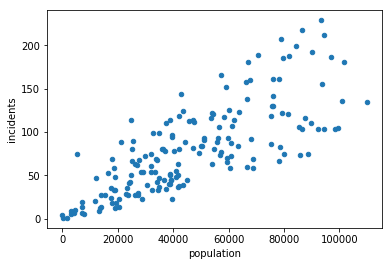

In [62]:
import matplotlib.pyplot as plt
import matplotlib as mpl
df_zipcode.plot.scatter(x='population', y='incidents')

7. For this question, only consider incidents that have information about whether a CO detector was present or not. We are interested in how many times more likely it is that an incident is long when no CO detector is present compared to when a CO detector is present. For events with CO detector and for those without one, compute the proportion of incidents that lasted $20-30, 30-40, 40-50, 50-60,$ and $60-70$ minutes (both interval boundary values included) by dividing the number of incidents in each time interval with the total number of incidents. 
    * For each bin, compute the ratio of the `CO detector absent` frequency to the `CO detector present` frequency.
    * Perform a linear regression of this ratio to the midpoint of the bins.
    * From this, what is the predicted ratio for events lasting $39$ minutes?

8. Calculate the chi-square test statistic for testing whether an incident is more likely to last longer than 60 minutes when CO detector is not present. Again only consider incidents that have information about whether a CO detector was present or not.

9. Please provide the script used to generate this result (max 10000 characters).

### Section 2: Cars in a circular road
#### ([Back to Top](#Table-of-Contents))
A circular road has $N$ positions labeled $0$ through $N-1$ where adjacent positions are connected to each other and position $N-1$ is connected to $0$. $M$ cars start at position $0$ through $M-1$ (inclusive). A car can make a valid move by moving forward one position (or goes from $N-1$ to $0$) if the position it is moving into is empty. At each turn, only consider cars that have a valid move available and make one of the valid moves that you choose randomly with equal probability. After $T$ rounds, we compute the average ($A$) and standard deviation ($S$) of the position of the cars.
1. What is the expected value of $A$ when $N = 10, M = 5,$ and $T = 20$?

2. What is the standard deviation of $A$ when $N = 10, M = 5,$ and $T = 20$?

3. What is the expected value of $S$ when $N = 10, M = 5,$ and $T = 20$?

4. What is the standard deviation of $S$ when $N = 10, M = 5,$ and $T = 20$?

5. What is the expected value of $A$ when $N = 25, M = 10,$ and $T = 50$?

6. What is the standard deviation of $A$ when $N = 25, M = 10,$ and $T = 50$?

7. What is the expected value of $S$ when $N = 25, M = 10,$ and $T = 50$?

8. What is the standard deviation of $S$ when $N = 25, M = 10,$ and $T = 50$?

9. Please provide the script used to generate this result (max 10000 characters).